In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

- Our Goal
    - Clean Data
    - Find correlation
    - Prepare Data (x/y, train_test_split)
    - Fit data
    - Predict / get accuracy graph


In [160]:
df = pd.read_csv('insurance.csv')

In [161]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


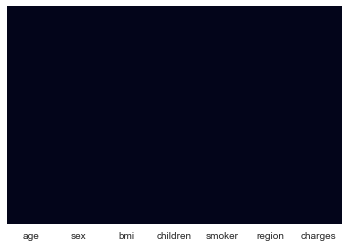

In [162]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False) 
# Perfect!

In [165]:
df['sex'] = pd.get_dummies(df['sex'], drop_first=True)
df['smoker'] = pd.get_dummies(df['smoker'], drop_first=True)
# df = pd.concat([df,pd.get_dummies(df['region'], drop_first=True)], axis=1)

In [169]:
def proc(col):
    if col == 'southwest':
        return 1
    elif col == 'southeast':
        return 2
    elif col == 'northwest':
        return 3
    elif col == 'northeast':
        return 3

In [175]:
# only multidimension accepts axis parameter!
df['region'] = df['region'].apply(proc)

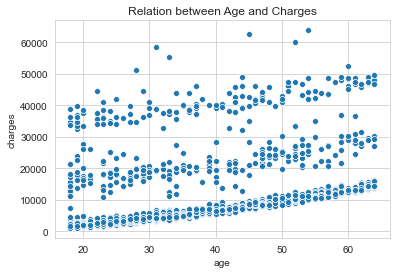

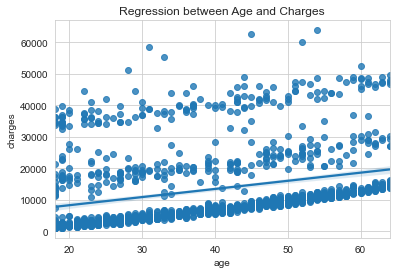

In [176]:
# Analyze Correlation
# https://www.kaggle.com/sujan97/analysing-medical-cost

plt.title('Relation between Age and Charges')
sns.scatterplot(x=df['age'],y=df['charges'])
plt.show()
plt.title('Regression between Age and Charges')
sns.regplot(x=df['age'],y=df['charges'])
plt.show()


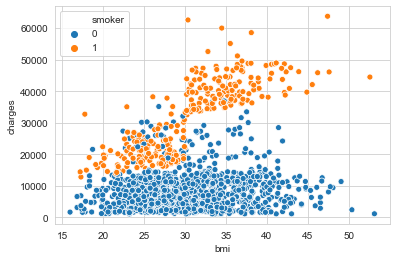

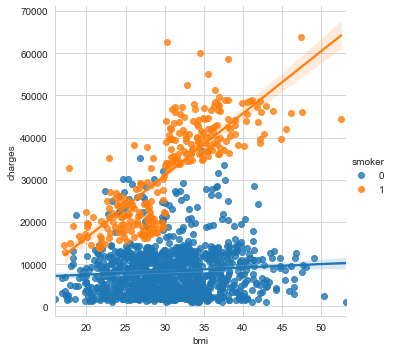

In [177]:
# Smoker
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
sns.lmplot(x="bmi", y="charges", hue="smoker", data=df)

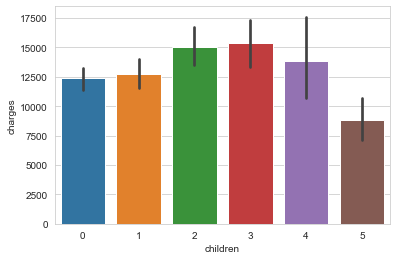

In [178]:
# Children
# Since children is integer values, here we don't use scatterplot
sns.barplot(x=df['children'],y=df['charges'])

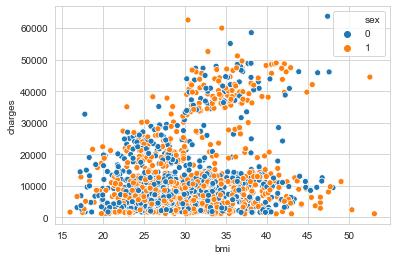

In [179]:
# Sex?
# sns.barplot(x=df['sex'], y=df['charges'])
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['sex'])

In [207]:
X = df[['age','bmi','smoker','children','region']]
y = df['charges']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=100)

In [209]:
lm = LinearRegression()

In [210]:
lm.fit(X_train, y_train)

LinearRegression()

In [211]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])

,Coeff
age,266.138336
bmi,290.993564
smoker,24793.369449
children,413.854383
region,522.464003


In [212]:
predict = lm.predict(X_test)

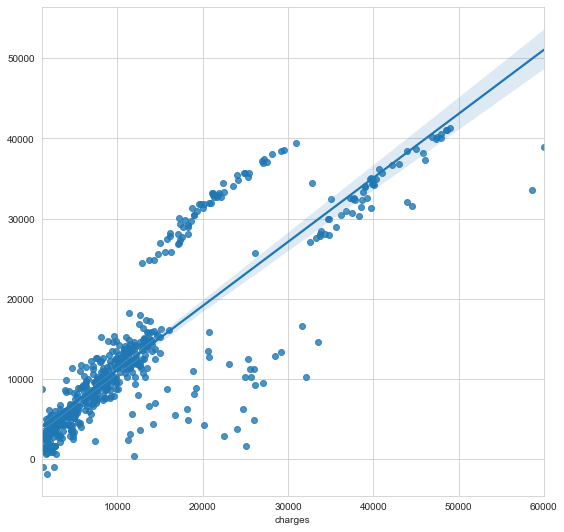

In [213]:
sns.set_style('whitegrid')
plt.figure(figsize=(9,9))
# sns.scatterplot(y_test,predict)

sns.regplot(x=y_test, y=predict)

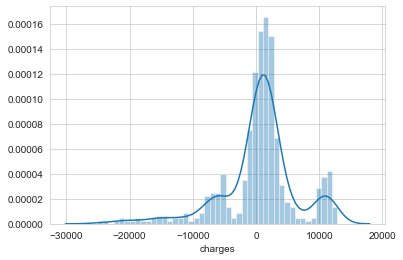

In [206]:
sns.distplot(predict-y_test)